In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the Data
data=pd.read_excel('telcom_data.xlsx')

In [3]:
print("The shape of data is",data.shape)

The shape of data is (150001, 55)


In [4]:
#Fields Description


#bearer id	xDr session identifier
#Dur. (ms)	Total Duration of the xDR (in ms)
#Start	Start time of the xDR (first frame timestamp)
#Start ms	Milliseconds offset of start time for the xDR (first frame timestamp)
#End	End time of the xDR (last frame timestamp)
#End ms	Milliseconds offset of end time of the xDR (last frame timestamp)
#Dur. (s)	Total Duration of the xDR (in s)
#IMSI	International Mobile Subscriber Identity
#MSISDN/Number	MS International PSTN/ISDN Number of mobile - customer number
#IMEI	International Mobile Equipment Identity
#Last Location Name	User location call name (2G/3G/4G) at the end of the bearer
#Avg RTT DL (ms)	Average Round Trip Time measurement Downlink direction (msecond)
#Avg RTT UL (ms)	Average Round Trip Time measurement Uplink direction (msecond)
#Avg Bearer TP DL (kbps)	Average Bearer Throughput for Downlink (kbps) - based on BDR duration
#Avg Bearer TP UL (kbps)	Average Bearer Throughput for uplink (kbps) - based on BDR duration
#TCP DL Retrans. Vol (Bytes)	TCP volume of Downlink packets detected as retransmitted (bytes)
#TCP UL Retrans. Vol (Bytes)	TCP volume of Uplink packets detected as retransmitted (bytes)
#DL TP < 50 Kbps (%)	Duration ratio when Bearer Downlink Throughput < ….
#50 Kbps < DL TP < 250 Kbps (%)	Duration ratio when Bearer Downlink Throughput range is …
#250 Kbps < DL TP < 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput range is …
#DL TP > 1 Mbps (%)	Duration ratio when Bearer Downlink Throughput > ….
#UL TP < 10 Kbps (%)	Duration ratio when Bearer Uplink Throughput < ….
#10 Kbps < UL TP < 50 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …
#50 Kbps < UL TP < 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput range is …
#UL TP > 300 Kbps (%)	Duration ratio when Bearer Uplink Throughput > ….
#HTTP DL (Bytes)	HTTP data volume (in Bytes) received by the MS during this session
#HTTP UL (Bytes)	HTTP data volume (in Bytes) sent by the MS during this session
#Activity Duration DL (ms)	Activity Duration for downlink (ms) - excluding periods of inactivity > 500 ms
#Activity Duration UL (ms)	Activity Duration for uplink (ms) - excluding periods of inactivity > 500 ms
#Dur. (ms).1	Total Duration of the xDR (in ms)
#Handset Manufacturer	Handset manufacturer 
#Handset Type	Handset type of the mobile device
#Nb of sec with 125000B < Vol DL	Number of seconds with IP Volume DL >
#Nb of sec with 1250B < Vol UL < 6250B	Number of seconds with IP Volume UL between …
#Nb of sec with 31250B < Vol DL < 125000B	Number of seconds with IP Volume DL between …
#Nb of sec with 37500B < Vol UL	Number of seconds with IP Volume UL >
#Nb of sec with 6250B < Vol DL < 31250B	Number of seconds with IP Volume DL between …
#Nb of sec with 6250B < Vol UL < 37500B	Number of seconds with IP Volume UL between …
#Nb of sec with Vol DL < 6250B	Number of seconds with IP Volume DL <
#Nb of sec with Vol UL < 1250B	Number of seconds with IP Volume UL <
#Social Media DL (Bytes)	Social Media data volume (in Bytes) received by the MS during this session
#Social Media UL (Bytes)	Social Media data volume (in Bytes) sent by the MS during this session
#YouTube DL (Bytes)	YouTube data volume (in Bytes) received by the MS during this session
#YouTube UL (Bytes)	YouTube data volume (in Bytes) sent by the MS during this session
#Netflix DL (Bytes)	Netflix data volume (in Bytes) received by the MS during this session
#Netflix UL (Bytes)	Netflix data volume (in Bytes) sent by the MS during this session
#Google DL (Bytes)	Google data volume (in Bytes) Received by the MS during this session
#Google UL (Bytes)	Google data volume (in Bytes) sent by the MS during this session
#Email DL (Bytes)	Email data volume (in Bytes) Received by the MS during this session
#Email UL (Bytes)	Email data volume (in Bytes) sent by the MS during this session
#Gaming DL (Bytes)	Gaming data volume (in Bytes) Received by the MS during this session
#Gaming UL (Bytes)	Gaming data volume (in Bytes) sent by the MS during this session
#Other DL	Other data volume (in Bytes) received by the MS during this session
#Other UL	Other data volume (in Bytes) sent by the MS during this session
#Total DL (Bytes)	Data volume (in Bytes) received by the MS during this session (IP layer + overhead)
#Total UL (Bytes)	Data volume (in Bytes) sent by the MS during this session (IP layer + overhead)


In [5]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
## Fetching the columns

data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


### TASK 2 - User Engagement Analysis

In [7]:
## Calculate Sessions Frequency

data['sessions_frequency'] = data.groupby('MSISDN/Number')['Bearer Id'].transform('count')

In [8]:
data['sessions_frequency']

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
149996    1.0
149997    2.0
149998    1.0
149999    1.0
150000    NaN
Name: sessions_frequency, Length: 150001, dtype: float64

In [9]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),sessions_frequency
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,1.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,1.0


In [10]:
## Calculate the duration of session

Session_Duration = data.loc[:,['Dur. (ms)']]


In [11]:
Session_Duration

,Dur. (ms)
0,1823652.0
1,1365104.0
2,1361762.0
3,1321509.0
4,1089009.0
...,...
149996,81230.0
149997,97970.0
149998,98249.0
149999,97910.0


In [12]:
## Adding a new column for Total_Traffic

data['Total_Traffic'] = data['Total UL (Bytes)']+data['Total DL (Bytes)']

In [13]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),sessions_frequency,Total_Traffic
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,2.0,345629377.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,2.0,707185356.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1.0,307690973.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,1.0,889352748.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,1.0,607681403.0


### Task 2.1

In [14]:
## User Engagement

user_engagement=data.loc[:,['MSISDN/Number','Dur. (ms)','Total_Traffic','sessions_frequency']]

In [15]:
user_engagement.head()

,MSISDN/Number,Dur. (ms),Total_Traffic,sessions_frequency
0,3.366496e+10,1823652.0,345629377.0,2.0
1,3.368185e+10,1365104.0,707185356.0,2.0
2,3.376063e+10,1361762.0,307690973.0,1.0
3,3.375034e+10,1321509.0,889352748.0,1.0
4,3.369980e+10,1089009.0,607681403.0,1.0


In [16]:
## Top 10 Customers as per Duration

Top_10_customers_duration = user_engagement.nlargest(10, ['Dur. (ms)'])

In [17]:
Top_10_customers_duration_data=Top_10_customers_duration

In [18]:
Top_10_customers_duration_data

,MSISDN/Number,Dur. (ms),Total_Traffic,sessions_frequency
125000,3.362578e+10,1859336.0,306500006.0,17.0
125001,3.362578e+10,1859327.0,890843614.0,17.0
0,3.366496e+10,1823652.0,345629377.0,2.0
125002,3.362578e+10,1772931.0,398879008.0,17.0
125003,3.362578e+10,1686493.0,452442976.0,17.0
100000,3.376355e+10,1679813.0,646195963.0,4.0
100001,3.376355e+10,1634983.0,388633434.0,4.0
125004,3.362578e+10,1600087.0,404869398.0,17.0
100002,3.366926e+10,1573420.0,370420998.0,1.0
25002,3.366172e+10,1480875.0,356783538.0,1.0


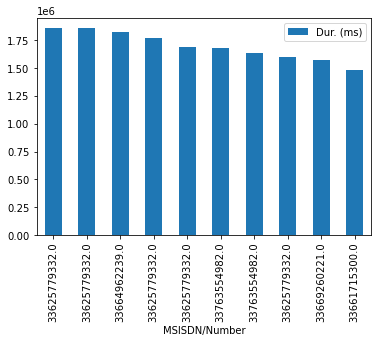

In [19]:
Top_10_customers_duration_data.plot(x="MSISDN/Number", y="Dur. (ms)", kind="bar")
plt.savefig('Top 10 Customers as per Duration')

In [20]:
## Top 10 customers as per Total Traffic

Top_10_customers_Total_Traffic = Top_10_customers_duration = user_engagement.nlargest(10, ['Total_Traffic'])

In [21]:
Top_10_customers_Total_Traffic_data=Top_10_customers_Total_Traffic

In [22]:
Top_10_customers_Total_Traffic_data

,MSISDN/Number,Dur. (ms),Total_Traffic,sessions_frequency
52132,3.367492e+10,220580.0,955984776.0,2.0
139859,3.366469e+10,86400.0,952641334.0,5.0
66831,3.366855e+10,86400.0,952307464.0,4.0
76847,3.365881e+10,86400.0,951775502.0,5.0
108567,3.366783e+10,146623.0,950760661.0,1.0
61053,3.361083e+10,100129.0,949987157.0,2.0
5384,3.360667e+10,50375.0,949598255.0,2.0
119866,3.366261e+10,86399.0,949292055.0,1.0
50913,3.366205e+10,275548.0,949172538.0,1.0
147934,3.366853e+10,92773.0,948809765.0,2.0


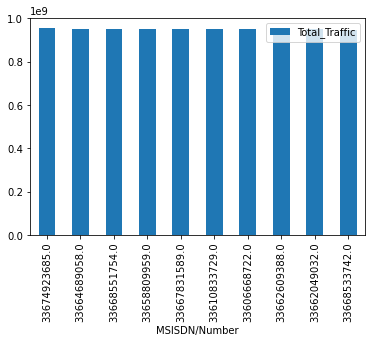

In [23]:
Top_10_customers_Total_Traffic_data.plot(x="MSISDN/Number", y="Total_Traffic", kind="bar")
plt.savefig('Top 10 Customers as per Total Traffic')

In [24]:
Top_10_customers_sessions_frequency=user_engagement[['MSISDN/Number','sessions_frequency']].value_counts().sort_values( ascending = False).head(10)

In [25]:
Top_10_customers_sessions_frequency_data=Top_10_customers_sessions_frequency

In [26]:
Top_10_customers_sessions_frequency_data

MSISDN/Number  sessions_frequency
3.362632e+10   18.0                  18
3.361489e+10   17.0                  17
3.362578e+10   17.0                  17
3.365973e+10   16.0                  16
3.376054e+10   15.0                  15
3.367588e+10   15.0                  15
3.366716e+10   13.0                  13
3.376041e+10   12.0                  12
3.360313e+10   12.0                  12
3.378632e+10   12.0                  12
dtype: int64

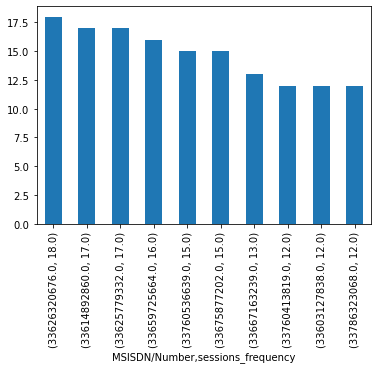

In [27]:
Top_10_customers_sessions_frequency_data.plot(x="MSISDN/Number", y="sessions_frequency", kind="bar")
plt.savefig('Top 10 Customers as per Sessions Frequency')

In [28]:
# Aggregate the metrics per customer id
grouped_data = data.groupby('MSISDN/Number').agg({'sessions_frequency': 'sum', 'Dur. (ms)': 'sum', 'Total_Traffic': 'sum'})

In [29]:
grouped_data

,sessions_frequency,Dur. (ms),Total_Traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197021e+12,1.0,877385.0,2.321240e+08


In [30]:
## Process the data for K-Means

def preprocessing(data):
    categorical_cols = []
    continious_cols = []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_cols.append(col)
            data[col].fillna(data[col].mode()[0], inplace = True)
            
        else:
            data[col].fillna(data[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, data

categorical_cols,continious_cols, data_preprocessed = preprocessing(grouped_data)

In [31]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
grouped_data_scaled_minmax = minmax.fit_transform(grouped_data)

In [32]:
# Run k-means clustering with k=3

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped_data_scaled_minmax)
grouped_data['cluster'] = kmeans.labels_

# Compute the minimum, maximum, average & total non-normalized metrics for each cluster
#cluster_metrics = grouped_data.groupby('cluster').agg(['min', 'max', 'mean', 'sum'])

In [33]:
# Compute the minimum, maximum, average & total non-normalized metrics for each cluster
cluster_metrics = grouped_data.groupby('cluster').agg(['min', 'max', 'mean', 'sum'])
cluster_metrics

sessions_frequency                             Dur. (ms)              \
                       min    max       mean       sum       min         max   
cluster                                                                        
0                      0.0   16.0   1.181073   60641.0    7142.0   1576929.0   
1                      0.0   25.0   2.346430  110362.0    7146.0   3174824.0   
2                      2.0  324.0  12.446450  105521.0   23292.0  18553754.0   

                                     Total_Traffic                \
                  mean           sum           min           max   
cluster                                                            
0        108558.140659  5.573809e+09  3.324901e+07  6.005611e+08   
1        141153.420037  6.639010e+09  5.851174e+08  1.427100e+09   
2        401747.879689  3.406019e+09  1.260555e+09  8.846226e+09   

                                     
                 mean           sum  
cluster                              
0        3.434418e+08  1.763368e+13  
1        8.510926e+08  4.003029e+13  
2        1.907228e+09  1.616948e+13

In [34]:
## Aggregate user total traffic per application and derive the top 10 most engaged users per application

## The Applications used by customers in the dataset are Social Media,Youtube,Netflix,Google,Email,Gaming


data['Total Traffic Social Media'] = data['Social Media DL (Bytes)']+data['Social Media UL (Bytes)']

data['Total Traffic YouTube'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']

data['Total TrafficNetflix'] = data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)']

data['Total Traffic Google'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']

data['Total Traffic Email'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']

data['Total Traffic Gaming'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']

In [35]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),sessions_frequency,Total_Traffic,Total Traffic Social Media,Total Traffic YouTube,Total TrafficNetflix,Total Traffic Google,Total Traffic Email,Total Traffic Gaming
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,36749741.0,308879636.0,2.0,345629377.0,1570185.0,18355943.0,17855187.0,2905912.0,3701304.0,292426453.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,2.0,707185356.0,1933278.0,39359124.0,35565545.0,4414096.0,937385.0,609920783.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1.0,307690973.0,1726277.0,34425237.0,23751202.0,10229119.0,3363124.0,229980251.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,1.0,889352748.0,657493.0,36534765.0,15092588.0,11811761.0,2070983.0,810387875.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,1.0,607681403.0,912788.0,34222253.0,17539799.0,7748843.0,2110349.0,531237049.0


In [36]:
User_Traffic_Per_Application = data.loc[:,['MSISDN/Number','Total Traffic Social Media','Total Traffic YouTube','Total TrafficNetflix','Total Traffic Google','Total Traffic Email','Total Traffic Gaming']]

In [37]:
User_Traffic_Per_Application

,MSISDN/Number,Total Traffic Social Media,Total Traffic YouTube,Total TrafficNetflix,Total Traffic Google,Total Traffic Email,Total Traffic Gaming
0,3.366496e+10,1.570185e+06,1.835594e+07,1.785519e+07,2.905912e+06,3.701304e+06,2.924265e+08
1,3.368185e+10,1.933278e+06,3.935912e+07,3.556554e+07,4.414096e+06,9.373850e+05,6.099208e+08
2,3.376063e+10,1.726277e+06,3.442524e+07,2.375120e+07,1.022912e+07,3.363124e+06,2.299803e+08
3,3.375034e+10,6.574930e+05,3.653476e+07,1.509259e+07,1.181176e+07,2.070983e+06,8.103879e+08
4,3.369980e+10,9.127880e+05,3.422225e+07,1.753980e+07,7.748843e+06,2.110349e+06,5.312370e+08
...,...,...,...,...,...,...,...
149996,3.365069e+10,3.517065e+06,2.795510e+07,3.756186e+07,1.278491e+07,6.908760e+05,5.358069e+08
149997,3.366345e+10,2.352181e+06,2.216552e+07,4.064329e+07,4.415361e+06,2.121718e+06,6.316281e+08
149998,3.362189e+10,1.260239e+06,2.451641e+07,1.502970e+07,6.585469e+06,2.058277e+06,5.669338e+08
149999,3.361962e+10,8.231090e+05,1.712251e+07,1.649484e+07,7.757267e+06,2.850914e+06,3.550664e+08


In [38]:
## Top 10 customers per application

for i in User_Traffic_Per_Application:
    if i=='MSISDN/Number':
        pass
    else:
        print(data[['MSISDN/Number',i]].sort_values(by = i, ascending = False).head(10))
        



        MSISDN/Number  Total Traffic Social Media
32217    3.366178e+10                   3650861.0
105238   3.375024e+10                   3650240.0
147105   3.365205e+10                   3648814.0
50251    3.365856e+10                   3648729.0
98107    3.361008e+10                   3648659.0
31907    3.366264e+10                   3648092.0
45504    3.376091e+10                   3648027.0
11151    3.366237e+10                   3647700.0
9945     3.364551e+10                   3647486.0
7417     3.366887e+10                   3647484.0
        MSISDN/Number  Total Traffic YouTube
66493    3.368757e+10             45190078.0
102091   3.366957e+10             45179008.0
15638    3.366407e+10             45170035.0
107601   3.366319e+10             45162724.0
135103   3.367443e+10             45158398.0
118044   3.376144e+10             45110515.0
45398    3.366740e+10             45108826.0
134564   3.360573e+10             45104757.0
13805    3.366455e+10             45093369.0


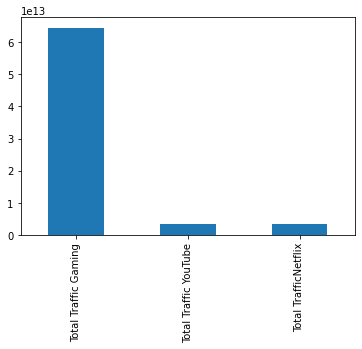

In [39]:
#Plot the top 3 most used applications
Top_3_App=User_Traffic_Per_Application[["Total Traffic Gaming","Total TrafficNetflix","Total Traffic YouTube"]].sum().sort_values(ascending=False).head(3)##plot(kind='bar',legend=True)
#top_3_apps = data['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'].sum().sort_values(ascending=False).head(3)
Top_3_App.plot(kind='bar')
plt.savefig('Top 3 Most Used Application')

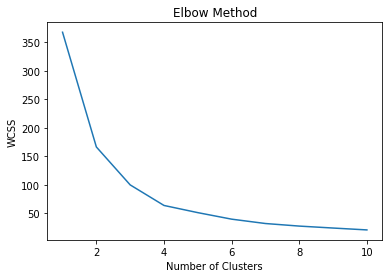

In [40]:
## Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(grouped_data_scaled_minmax)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow Method')
plt.show()

#### Elbow method is used to find the optimized value of k by plotting WCSS and Number of Clusters. The above plot shows the the optimum value of k is 4

### Task 3 - Experience Analysis

In [41]:
## Processing the Data

def preprocessing(data):
    
    categorical_cols = []
    continious_cols = []
    for col in data.columns:
        if data[col].dtypes == "object":
            categorical_cols.append(col)
            data[col].fillna(data[col].mode()[0], inplace = True)
            
        else:
            data[col].fillna(data[col].mean(), inplace = True)
            continious_cols.append(col)
    return categorical_cols,continious_cols, data

categorical_cols,continious_cols, data_preprocessed = preprocessing(data)

### Task 3.1

In [42]:
## Aggregate per customer 

data['Average TCP'] = data['TCP DL Retrans. Vol (Bytes)']+data['TCP UL Retrans. Vol (Bytes)']
data['Average RTT'] = data['Avg RTT DL (ms)']+data['Avg RTT UL (ms)']
data['Average Throughput'] = data['Avg Bearer TP DL (kbps)']+data['Avg Bearer TP UL (kbps)']
data_agg = data.groupby(['MSISDN/Number']).agg({'Average TCP' :'mean','Average RTT': 'mean', 'Average Throughput': 'mean', 'Handset Type': 'first'})

print(data_agg.head())





                Average TCP  Average RTT  Average Throughput  \
MSISDN/Number                                                  
3.360100e+10   2.156957e+07    46.000000                76.0   
3.360100e+10   2.156957e+07    31.000000                99.0   
3.360100e+10   2.156957e+07   127.458589                97.0   
3.360101e+10   7.607247e+05    84.000000               248.0   
3.360101e+10   1.547020e+07    59.500000             28422.0   

                                 Handset Type  
MSISDN/Number                                  
3.360100e+10   Huawei P20 Lite Huawei Nova 3E  
3.360100e+10           Apple iPhone 7 (A1778)  
3.360100e+10                        undefined  
3.360101e+10          Apple iPhone 5S (A1457)  
3.360101e+10          Apple iPhone Se (A1723)  


In [43]:
print(data_agg)

                Average TCP  Average RTT  Average Throughput  \
MSISDN/Number                                                  
3.360100e+10   2.156957e+07    46.000000           76.000000   
3.360100e+10   2.156957e+07    31.000000           99.000000   
3.360100e+10   2.156957e+07   127.458589           97.000000   
3.360101e+10   7.607247e+05    84.000000          248.000000   
3.360101e+10   1.547020e+07    59.500000        28422.000000   
...                     ...          ...                 ...   
3.379000e+10   2.156957e+07    40.000000          116.000000   
4.188282e+10   1.698397e+07   309.123982        16958.943222   
3.197021e+12   2.156957e+07   127.458589            1.000000   
3.370000e+14   2.156957e+07   127.458589           33.000000   
8.823971e+14   2.156957e+07   127.458589            2.000000   

                                   Handset Type  
MSISDN/Number                                    
3.360100e+10     Huawei P20 Lite Huawei Nova 3E  
3.360100e+10     

### Task 3.2

In [44]:
### TOP TCP VALUES

print(data['Average TCP'].nlargest(10))

print()

print(data['Average TCP'].nsmallest(10))

34636     4.344116e+09
140797    4.301477e+09
77950     4.294432e+09
135677    4.291465e+09
3741      4.288121e+09
119667    4.275492e+09
39608     4.268647e+09
59011     4.261616e+09
76971     4.260174e+09
41182     4.254660e+09
Name: Average TCP, dtype: float64

143594     86.0
111100     97.0
18417     106.0
13142     108.0
97061     113.0
8794      128.0
99947     129.0
83214     134.0
95955     134.0
12849     143.0
Name: Average TCP, dtype: float64


In [45]:
### Frequent TCP VALUES

print(data['Average TCP'].value_counts().head(10))




2.156957e+07    85265
2.081121e+07      650
7.609887e+05      249
2.081124e+07      248
7.596967e+05      136
7.597507e+05      132
2.081123e+07      132
7.623187e+05      121
7.609767e+05      106
2.081257e+07       99
Name: Average TCP, dtype: int64


In [46]:
## Top 10 Top, Bottom and Most Frequent

print(data['Average RTT'].nlargest(10))

print(data['Average RTT'].nsmallest(10))

print(data['Average RTT'].value_counts().head(10))


30155     96924.0
29916     64641.0
17894     55812.0
5963      54848.0
22839     27278.0
23442     26300.0
1361      25922.0
81256     25715.0
97312     25388.0
100575    24738.0
Name: Average RTT, dtype: float64
42602     0.0
103321    0.0
124538    0.0
143878    0.0
71738     2.0
50966     4.0
144923    4.0
103544    5.0
8756      6.0
123210    6.0
Name: Average RTT, dtype: float64
127.458589    27801
29.000000      4993
39.000000      4222
38.000000      2761
40.000000      2647
30.000000      2592
28.000000      2424
49.000000      2219
41.000000      1978
31.000000      1960
Name: Average RTT, dtype: int64


In [47]:
### TOP 10 Throughput Values


print(data['Average Throughput'].nlargest(10))





120876    382262.0
143670    313244.0
141250    304299.0
91298     300546.0
116794    283931.0
141449    281144.0
149616    277152.0
92177     276205.0
116550    274052.0
117776    269888.0
Name: Average Throughput, dtype: float64


In [48]:
## BOTTOM 10 Throughput

print(data['Average Throughput'].nsmallest(10))



148     0.0
614     0.0
2460    0.0
3893    0.0
4129    0.0
4822    0.0
5796    0.0
5961    0.0
6135    0.0
7186    0.0
Name: Average Throughput, dtype: float64


In [49]:
## Most Frequent Throughput Values

print(data['Average Throughput'].value_counts().head(10))



63.0    3886
15.0    3741
97.0    1945
90.0    1885
98.0    1801
96.0    1671
99.0    1571
89.0    1557
91.0    1520
93.0    1491
Name: Average Throughput, dtype: int64


### Task 3.3


In [50]:
## Average Throughput

avg_throughput_per_handset_type = data.groupby(['Handset Type'])['Average Throughput'].mean()
print(avg_throughput_per_handset_type)

Handset Type
A-Link Telecom I. Cubot A5                                                             23510.000000
A-Link Telecom I. Cubot Note Plus                                                       6699.000000
A-Link Telecom I. Cubot Note S                                                          8937.000000
A-Link Telecom I. Cubot Nova                                                           56217.000000
A-Link Telecom I. Cubot Power                                                          69468.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       58.000000
Zyxel Communicat. Lte7460                                                              61956.000000
Zyxel Communicat. Sbg3600                                                              97351.000000
Zyxel Communicat. Zyxel Wah7706                                                        

In [51]:
## Average TCP Retransmission

avg_throughput_per_handset_type = data.groupby(['Handset Type'])['Average TCP'].mean()
print(avg_throughput_per_handset_type)

Handset Type
A-Link Telecom I. Cubot A5                                                             2.156957e+07
A-Link Telecom I. Cubot Note Plus                                                      6.162130e+05
A-Link Telecom I. Cubot Note S                                                         4.141173e+07
A-Link Telecom I. Cubot Nova                                                           1.371700e+05
A-Link Telecom I. Cubot Power                                                          8.041000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.116595e+07
Zyxel Communicat. Lte7460                                                              4.127655e+07
Zyxel Communicat. Sbg3600                                                              5.348694e+07
Zyxel Communicat. Zyxel Wah7706                                                        

### Task 3.4

In [52]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3).fit(data[['Average TCP',  'Average RTT' , 'Average Throughput']])
data['Cluster'] = kmeans.labels_

for i in range(3):
    print(f'Cluster {i}:')
    print(data[data['Cluster'] == i][['Average TCP',  'Average RTT' , 'Average Throughput']].describe())
    print('\n')


Cluster 0:
        Average TCP    Average RTT  Average Throughput
count  1.495900e+05  149590.000000       149590.000000
mean   1.625214e+07     127.363833        14923.835661
std    2.267078e+07     565.839951        26661.163319
min    8.600000e+01       0.000000            0.000000
25%    1.477814e+06      40.000000           90.000000
50%    2.156957e+07      67.000000          125.000000
75%    2.156957e+07     127.458589        22066.000000
max    5.939955e+08   96924.000000       382262.000000


Cluster 1:
        Average TCP  Average RTT  Average Throughput
count  1.660000e+02   166.000000          166.000000
mean   3.108402e+09   147.837349        72114.644578
std    6.460335e+08   108.066551        33727.875940
min    2.144277e+09    52.000000        22336.000000
25%    2.581244e+09    87.250000        48230.750000
50%    3.032367e+09   113.000000        65504.000000
75%    3.652572e+09   163.250000        91489.000000
max    4.344116e+09   812.000000       226056.000000


Cl

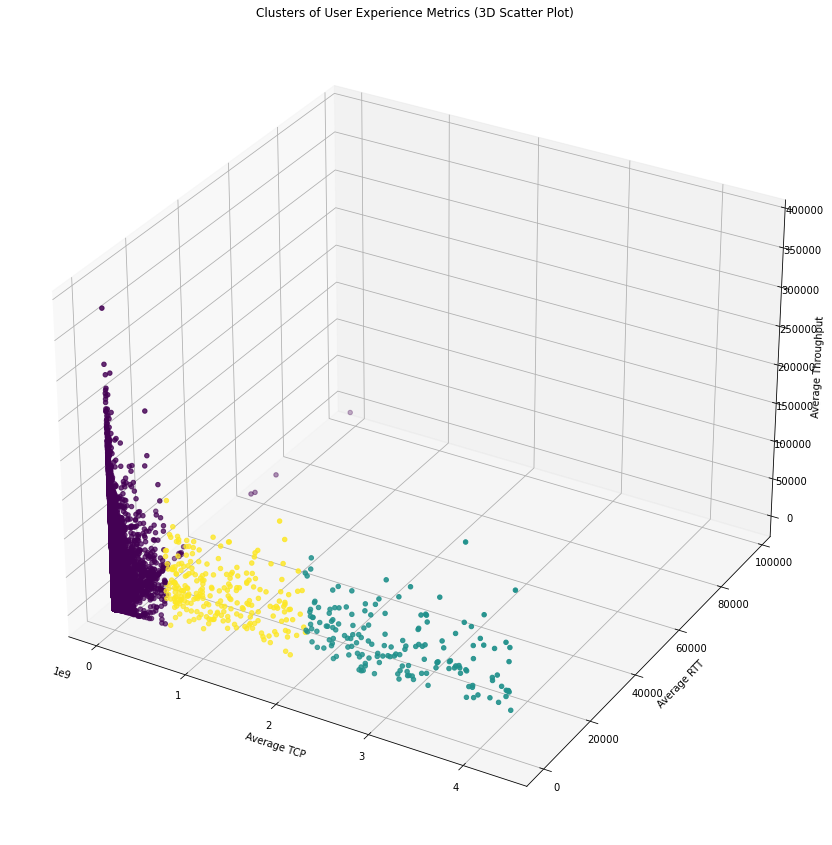

In [53]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

x = data['Average TCP']
y = data['Average RTT']
z = data['Average Throughput']
c = data['Cluster']

scatter = ax.scatter(x, y, z, c=c)

ax.set_xlabel('Average TCP')
ax.set_ylabel('Average RTT')
ax.set_zlabel('Average Throughput')


plt.title('Clusters of User Experience Metrics (3D Scatter Plot)')
plt.savefig("User Experience Cluster")
plt.show()